In [2]:
from huggingface_hub import HfApi, notebook_login

# Hugging Face 계정으로 로그인
notebook_login()


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd

# 모델과 토크나이저 로드
model_name = "Doowon96/bert-base-finetuned-ynat"  # 파인튜닝된 모델의 경로 또는 이름
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# GPU 사용 설정 (가능한 경우)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [10]:
from sklearn.preprocessing import LabelEncoder
# CSV 파일 경로
csv_file = "news_data.csv"

# CSV 파일 읽기
data = pd.read_csv(csv_file)

# 라벨 인코더 생성 및 라벨 매핑 학습
label_encoder = LabelEncoder()
label_encoder.fit(['IT/과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'])

# 데이터셋에 라벨 인코딩 적용
data['encoded_category'] = label_encoder.transform(data['category'])

# 모델 학습, 예측, 평가 등의 과정에 'encoded_category' 사용
# 예: true_labels = data['encoded_category']

# 예측을 위한 함수
def predict_category(title):
    inputs = tokenizer(title, return_tensors="pt", max_length=512, truncation=True, padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1)
    return prediction.item()  # 또는 라벨 매핑에 따라 카테고리 이름 반환

# 데이터의 제목에 대해 예측 수행
data['predicted_category'] = data['title'].apply(predict_category)

# 결과 출력 또는 저장
print(data[['title', 'predicted_category']])

                                                 title  predicted_category
0                  이차전지 10년 투자로 7200% 벌었다…신한證, 빅데이터 공개                   1
1                        마약류 오남용 통합감시 시스템 구축…"불법 사전차단"                   2
2                   통계청, 서울대에 통계데이터센터 신설…“데이터기반 연구 지원”                   0
3                  K-뷰티 견인하는 화장품 천연소재, 특허 빅데이터 분석해 찾는다                   0
4           NIA, ‘빅데이터 플랫폼 기반’ 2024년 데이터 분석 지원 수요기업 모집                   0
..                                                 ...                 ...
395                K-뷰티 견인하는 화장품 천연소재, 특허 빅데이터 분석해 찾는다                   0
396         NIA, ‘빅데이터 플랫폼 기반’ 2024년 데이터 분석 지원 수요기업 모집                   0
397   "입법은 정치 아닌 과학의 영역으로" 국회입법조사처 '입법영향분석' 법제화 초석 다지기                   6
398                     '체납징수' 팔걷은 정선군…"전담반에 빅데이터 분석도"                   2
399  [가상자산 2024] 주기영 크립토퀀트 대표 “블록체인 데이터 분석으로 투명한 투자...                   1

[400 rows x 2 columns]


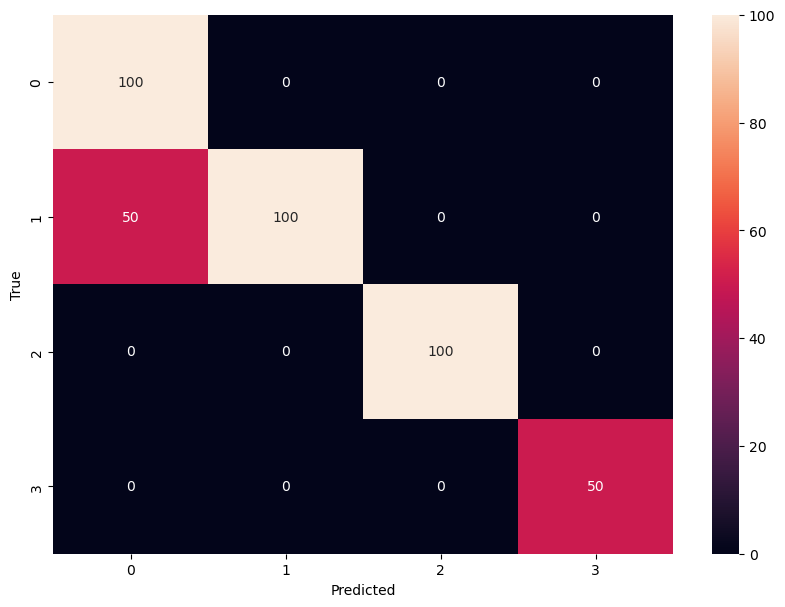

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 실제 라벨과 예측 라벨
true_labels = data['encoded_category']  # 실제 카테고리 라벨이 있다고 가정
predicted_labels = data['predicted_category']

# 혼동 행렬 생성
cm = confusion_matrix(true_labels, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       100
           1       1.00      0.67      0.80       150
           2       1.00      1.00      1.00       100
           6       1.00      1.00      1.00        50

    accuracy                           0.88       400
   macro avg       0.92      0.92      0.90       400
weighted avg       0.92      0.88      0.88       400



In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


In [18]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/4c/a4785425971e7433a7d80fa0ff9cd9f5f35303d4e99446190d91c72648c9/shap-0.44.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   --------------------------------------  440.3/448.0 kB 13.9 MB/s eta 0:00:01
   --------------------------------------- 448.0/448.0 kB 14.1 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\endnj\anaconda3\lib\site-packages\huggingface_hub-0.20.2-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [47]:
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

def score_and_visualize(text):
    prediction = pipe([text])
    print(prediction[0])

    explainer = shap.Explainer(pipe)
    shap_values = explainer([text])

    shap.plots.text(shap_values)


In [49]:
import random

# 랜덤으로 하나의 뉴스 제목 선택
random_title = random.choice(data['title'].tolist())

# 선택된 제목으로 score_and_visualize 함수 호출
score_and_visualize(random_title)


[{'label': 'LABEL_0', 'score': 0.6958896517753601}, {'label': 'LABEL_1', 'score': 0.04274982959032059}, {'label': 'LABEL_2', 'score': 0.24838323891162872}, {'label': 'LABEL_3', 'score': 0.0017633783863857388}, {'label': 'LABEL_4', 'score': 0.006493227556347847}, {'label': 'LABEL_5', 'score': 0.00261546578258276}, {'label': 'LABEL_6', 'score': 0.0021051503717899323}]


  0%|          | 0/342 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:38, 38.16s/it]                                                                   


In [50]:
print("Current device:", model.device)  # 방법 1: 직접 model.device 확인 (모든 모델에서 작동하지 않을 수 있음)


Current device: cpu


In [51]:
print("Current device (from parameters):", next(model.parameters()).device)  # 방법 2: 모델의 파라미터에서 장치 확인


Current device (from parameters): cpu


In [3]:
!pip install torch

DEPRECATION: Loading egg at c:\users\endnj\anaconda3\lib\site-packages\huggingface_hub-0.20.2-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
import torch

print(torch.cuda.is_available())  # CUDA 사용 가능 여부 출력
print(torch.version.cuda)        # 설치된 PyTorch의 CUDA 버전 출력


False
None


In [2]:
import sys
print(sys.executable)

C:\Users\endnj\anaconda3\python.exe
